---
title: 'Walkthroughs and Exercises for *Data Analysis in Python*'  
author: "Dr. Chester Ismay"   
---

In [1]:
# !pip install pandas matplotlib seaborn plotly openpyxl

In [1]:
import pandas as pd

# Display all columns
pd.set_option('display.max_columns', None)

# Display all outputs from each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Intro: Foundations of Data Analysis with Python

## Walkthrough #1: Setting Up the Python Environment

If you haven't already installed Python, Jupyter, and the necessary packages, there are instructions on the course repo in the README to do so [here](https://github.com/ismayc/oreilly-data-analysis-with-python/blob/main/README.md). 

If you aren't able to do this on your machine, you may want to check out [Google Colab](https://colab.research.google.com/). It's a free service that allows you to run Jupyter notebooks in the cloud.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# For plotly to load directly in Jupyter notebook
import plotly.io as pio
pio.renderers.default = 'iframe'

## Exercise #1: Setting Up the Python Environment

By completing this exercise, you will be able to  
- Import necessary Python packages  
- Check for successful package loading  


Follow the instructions above in Walkthrough #1 to check for correct installation 
of necessary packages. We'll wait a few minutes to make sure as many of you are
set up as possible. Please give a thumbs up in the pulse check if you are ready
to move on.

---

# Module 1: Data Wrangling with Pandas

## Walkthrough #2: Loading and Inspecting Data with Pandas

### Import data from a CSV or from an Excel file

In [4]:
# Load the data from a CSV file
economies = pd.read_csv("economies.csv")

# Or load the data from an Excel file
economies = pd.read_excel("economies.xlsx")

### Perform an initial exploration of the data

In [5]:
# Display the first few rows of the DataFrame
economies.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.950,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.620,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income


In [6]:
# Display the information about the DataFrame
economies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               561 non-null    object 
 1   country            561 non-null    object 
 2   year               561 non-null    int64  
 3   gdp_percapita      558 non-null    float64
 4   gross_savings      490 non-null    float64
 5   inflation_rate     555 non-null    float64
 6   total_investment   490 non-null    float64
 7   unemployment_rate  312 non-null    float64
 8   exports            509 non-null    float64
 9   imports            506 non-null    float64
 10  income_group       561 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 48.3+ KB


In [7]:
# Display summary statistics of the DataFrame
economies.describe()

,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports
count,561.000000,558.000000,490.000000,555.000000,490.000000,312.000000,509.000000,506.000000
mean,2015.000000,13447.838281,20.641665,9.762438,25.348976,8.894619,-0.844275,0.813121
std,4.086126,18481.107981,10.813159,103.013164,23.546022,5.605188,17.817279,15.644724
min,2010.000000,231.549000,-10.331000,-3.900000,0.521000,0.900000,-80.939000,-59.381000
25%,2010.000000,1842.815000,14.129000,0.731000,18.449250,5.252250,-8.528000,-8.253000
50%,2015.000000,5049.830000,20.536000,2.507000,22.808000,7.400000,1.000000,1.334000
75%,2020.000000,16509.697500,26.819750,5.406000,27.644750,10.772000,8.033000,9.348000
max,2020.000000,116921.110000,59.699000,2355.150000,363.411000,32.050000,159.103000,84.555000


In [8]:
# Check for missing data
economies.isnull().sum()

code                   0
country                0
year                   0
gdp_percapita          3
gross_savings         71
inflation_rate         6
total_investment      71
unemployment_rate    249
exports               52
imports               55
income_group           0
dtype: int64

In [9]:
# Check data types
economies.dtypes

code                  object
country               object
year                   int64
gdp_percapita        float64
gross_savings        float64
inflation_rate       float64
total_investment     float64
unemployment_rate    float64
exports              float64
imports              float64
income_group          object
dtype: object

## Exercise #2: Loading and Inspecting Data with Pandas

By completing this exercise, you will be able to use `pandas` to  
- Import data from a CSV or from an Excel file   
- Perform an initial exploration of the data  

In [10]:
# Load the populations data from an Excel file
populations = pd.read_excel("populations.xlsx")

# Inspection methods for populations DataFrame
populations.head()

populations.info()

populations.describe()

# Checking for missing data and data types for populations DataFrame
populations.isnull().sum()

populations.dtypes

,country_code,country,year,fertility_rate,life_expectancy,size,official_state_name,sovereignty,continent,region
0,ABW,Aruba,2010,1.941,75.404,100341,Aruba,Netherlands,North America,Caribbean
1,ABW,Aruba,2015,1.972,75.683,104257,Aruba,Netherlands,North America,Caribbean
2,ABW,Aruba,2020,1.325,75.723,106585,Aruba,Netherlands,North America,Caribbean
3,AFG,Afghanistan,2010,6.099,60.851,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
4,AFG,Afghanistan,2015,5.405,62.659,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         645 non-null    object 
 1   country              645 non-null    object 
 2   year                 645 non-null    int64  
 3   fertility_rate       627 non-null    float64
 4   life_expectancy      623 non-null    float64
 5   size                 645 non-null    int64  
 6   official_state_name  645 non-null    object 
 7   sovereignty          645 non-null    object 
 8   continent            645 non-null    object 
 9   region               645 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 50.5+ KB


,year,fertility_rate,life_expectancy,size
count,645.000000,627.000000,623.000000,6.450000e+02
mean,2015.000000,2.727907,71.553996,3.429149e+07
std,4.085651,1.386750,8.118422,1.346457e+08
min,2010.000000,0.837000,45.596000,1.024100e+04
25%,2010.000000,1.670000,65.742000,7.550310e+05
50%,2015.000000,2.216000,73.004000,6.292731e+06
75%,2020.000000,3.537500,77.720695,2.301265e+07
max,2020.000000,7.485000,85.497561,1.411100e+09


country_code            0
country                 0
year                    0
fertility_rate         18
life_expectancy        22
size                    0
official_state_name     0
sovereignty             0
continent               0
region                  0
dtype: int64

country_code            object
country                 object
year                     int64
fertility_rate         float64
life_expectancy        float64
size                     int64
official_state_name     object
sovereignty             object
continent               object
region                  object
dtype: object

## Walkthrough #3: Cleaning and Preparing Data with Pandas

### Handle missing data

#### Remove rows

In [11]:
# Remove rows with any missing values
economies_cleaned_any = economies.dropna(how='any')
economies_cleaned_any

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
9,ALB,Albania,2010,4097.83,20.023,3.615,31.318,14.000,10.473,-9.316,Upper middle income
10,ALB,Albania,2015,3953.61,15.804,1.868,26.237,17.100,5.272,0.076,Upper middle income
11,ALB,Albania,2020,5286.68,13.255,1.603,22.845,12.500,-28.951,-21.446,Upper middle income
15,ARG,Argentina,2010,10412.97,17.323,10.461,17.706,7.750,13.701,39.414,Upper middle income
17,ARG,Argentina,2020,8554.64,17.798,42.015,16.845,11.364,-13.124,-10.722,Upper middle income
...,...,...,...,...,...,...,...,...,...,...,...
541,VNM,Vietnam,2015,2582.39,26.444,0.631,27.339,2.330,9.713,15.426,Lower middle income
542,VNM,Vietnam,2020,3498.98,28.603,3.222,26.444,3.300,2.822,2.948,Lower middle income
552,ZAF,South Africa,2010,7311.74,18.012,4.264,19.513,24.875,7.718,10.794,Upper middle income
553,ZAF,South Africa,2015,5731.73,16.300,4.575,20.918,25.350,2.925,5.443,Upper middle income


In [12]:
# Remove rows only if all values are missing
economies_cleaned_all = economies.dropna(how='all')
economies_cleaned_all

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.950,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.620,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income
...,...,...,...,...,...,...,...,...,...,...,...
556,ZMB,Zambia,2015,1310.460,40.103,10.107,42.791,NaN,-11.407,0.696,Lower middle income
557,ZMB,Zambia,2020,981.311,36.030,16.350,34.514,NaN,1.143,2.635,Lower middle income
558,ZWE,Zimbabwe,2010,975.851,NaN,3.045,NaN,NaN,NaN,NaN,Lower middle income
559,ZWE,Zimbabwe,2015,1425.010,NaN,-2.410,NaN,NaN,NaN,NaN,Lower middle income


In [13]:
# Remove rows with missing values in specific columns
economies_cleaned_subset = economies.dropna(subset=['exports', 'imports'])
economies_cleaned_subset

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income
5,AFG,Afghanistan,2020,580.817,27.132,5.607,16.420,NaN,-10.424,2.892,Low income
6,AGO,Angola,2010,3641.440,34.833,14.480,28.197,NaN,-3.266,-21.656,Lower middle income
7,AGO,Angola,2015,4354.920,28.491,9.159,34.202,NaN,6.721,-19.515,Lower middle income
...,...,...,...,...,...,...,...,...,...,...,...
553,ZAF,South Africa,2015,5731.730,16.300,4.575,20.918,25.350,2.925,5.443,Upper middle income
554,ZAF,South Africa,2020,5067.150,14.602,3.268,12.426,29.175,-10.280,-16.615,Upper middle income
555,ZMB,Zambia,2010,1456.050,37.405,8.500,29.878,NaN,19.476,32.492,Lower middle income
556,ZMB,Zambia,2015,1310.460,40.103,10.107,42.791,NaN,-11.407,0.696,Lower middle income


#### Remove columns

In [14]:
# Remove columns with any missing values
economies_no_missing_columns = economies.dropna(axis=1)

# Display the DataFrame after removing columns with missing values
economies_no_missing_columns.head()

,code,country,year,income_group
0,ABW,Aruba,2010,High income
1,ABW,Aruba,2015,High income
2,ABW,Aruba,2020,High income
3,AFG,Afghanistan,2010,Low income
4,AFG,Afghanistan,2015,Low income


#### Replace missing values with specific value

In [15]:
# Replace missing values with a specific value (e.g., 0 for numerical columns, 'Unknown' for categorical columns)
economies_fill_value = economies.fillna({
    'gdp_percapita': 0,
    'gross_savings': 0,
    'inflation_rate': 0,
    'total_investment': 0,
    'unemployment_rate': 0,
    'exports': 0,
    'imports': 0,
    'income_group': 'Unknown'
})

# Display the DataFrame after replacing missing values with specific values
economies_fill_value.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.950,13.255,2.078,0.000,10.600,0.000,0.000,High income
1,ABW,Aruba,2015,27126.620,21.411,0.475,0.000,7.298,0.000,0.000,High income
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,0.000,13.997,0.000,0.000,High income
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,0.000,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,0.000,-11.585,15.309,Low income


This can be extended to replace missing values with the mean, median, or mode of the column too, but that's beyond the scope of this course.

### Convert a column to a different data type

In [16]:
# Change year to be a string instead of an integer
economies_char_year = economies.astype({'year': 'str'})

# Display the information on the DataFrame with year as a string
economies_char_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               561 non-null    object 
 1   country            561 non-null    object 
 2   year               561 non-null    object 
 3   gdp_percapita      558 non-null    float64
 4   gross_savings      490 non-null    float64
 5   inflation_rate     555 non-null    float64
 6   total_investment   490 non-null    float64
 7   unemployment_rate  312 non-null    float64
 8   exports            509 non-null    float64
 9   imports            506 non-null    float64
 10  income_group       561 non-null    object 
dtypes: float64(7), object(4)
memory usage: 48.3+ KB


In [17]:
# Change the year of string type back to integer
economies_int_year = economies_char_year.astype({'year': 'int'})

# Display the information on the DataFrame with year as a string
economies_int_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               561 non-null    object 
 1   country            561 non-null    object 
 2   year               561 non-null    int64  
 3   gdp_percapita      558 non-null    float64
 4   gross_savings      490 non-null    float64
 5   inflation_rate     555 non-null    float64
 6   total_investment   490 non-null    float64
 7   unemployment_rate  312 non-null    float64
 8   exports            509 non-null    float64
 9   imports            506 non-null    float64
 10  income_group       561 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 48.3+ KB


### Rename a column

In [ ]:
# For getting information about a particular method
?economies.fillna

In [18]:
# Rename the 'income_group' column to 'income_category'
economies_renamed = economies.rename(columns={'income_group': 'income_category'})
economies_renamed.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_category
0,ABW,Aruba,2010,24087.950,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.620,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income


### Changing a DataFrame’s index

#### Set the index

In [19]:
# Set unique combinations of 'code' and 'year' as the index
economies_indexed = economies.set_index(['code', 'year'])
economies_indexed.head()

country  gdp_percapita  gross_savings  inflation_rate  \
code year                                                              
ABW  2010        Aruba      24087.950         13.255           2.078   
     2015        Aruba      27126.620         21.411           0.475   
     2020        Aruba      21832.920         -7.521          -1.338   
AFG  2010  Afghanistan        631.490         59.699           2.179   
     2015  Afghanistan        711.337         22.223          -0.662   

           total_investment  unemployment_rate  exports  imports income_group  
code year                                                                      
ABW  2010               NaN             10.600      NaN      NaN  High income  
     2015               NaN              7.298      NaN      NaN  High income  
     2020               NaN             13.997      NaN      NaN  High income  
AFG  2010            30.269                NaN    9.768   32.285   Low income  
     2015            18.427                NaN  -11.585   15.309   Low income

#### Reset the index

In [20]:
# Reset the index
economies_reset = economies_indexed.reset_index()
economies_reset.head()

,code,year,country,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,2010,Aruba,24087.950,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,2015,Aruba,27126.620,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,2020,Aruba,21832.920,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
3,AFG,2010,Afghanistan,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,2015,Afghanistan,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income


### Filtering rows based on conditions

#### Conditions on a single column

In [21]:
# Filter rows where 'gdp_percapita' is greater than 20,000
economies_high_gdp = economies[economies['gdp_percapita'] > 20000]
economies_high_gdp.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.95,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.62,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.92,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
12,ARE,United Arab Emirates,2010,35064.26,31.330,0.878,27.121,NaN,7.540,0.405,High income
13,ARE,United Arab Emirates,2015,37380.57,30.540,4.070,25.639,NaN,3.055,2.488,High income


In [22]:
# Filter rows where 'income_group' is 'High income'
economies_high_income = economies[economies['income_group'] == 'High income']
economies_high_income.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.95,13.255,2.078,NaN,10.600,NaN,NaN,High income
1,ABW,Aruba,2015,27126.62,21.411,0.475,NaN,7.298,NaN,NaN,High income
2,ABW,Aruba,2020,21832.92,-7.521,-1.338,NaN,13.997,NaN,NaN,High income
12,ARE,United Arab Emirates,2010,35064.26,31.330,0.878,27.121,NaN,7.540,0.405,High income
13,ARE,United Arab Emirates,2015,37380.57,30.540,4.070,25.639,NaN,3.055,2.488,High income


In [23]:
# Filter rows where total_investment is not NaN
non_null_investment = economies[economies['total_investment'].notna()]
non_null_investment.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income
5,AFG,Afghanistan,2020,580.817,27.132,5.607,16.420,NaN,-10.424,2.892,Low income
6,AGO,Angola,2010,3641.440,34.833,14.480,28.197,NaN,-3.266,-21.656,Lower middle income
7,AGO,Angola,2015,4354.920,28.491,9.159,34.202,NaN,6.721,-19.515,Lower middle income


#### Conditions on multiple columns

In [24]:
# Filter rows where inflation_rate is less than 0 and income_group is 'Low income'
deflation_low_income = economies[(economies['inflation_rate'] < 0) & (economies['income_group'] == 'Low income')]
deflation_low_income.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income
42,BFA,Burkina Faso,2010,648.365,20.194,-0.608,21.990,NaN,54.547,13.986,Low income
486,TCD,Chad,2010,895.354,25.871,-2.110,34.388,NaN,-5.488,17.218,Low income


In [25]:
# Filter rows where gdp_percapita is greater than 40,000 and year is less than or equal to 2016
top_gdp_2010_2015 = economies[(economies['gdp_percapita'] > 40000) & (economies['year'] <= 2015)]
top_gdp_2010_2015.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
24,AUS,Australia,2010,56459.80,23.105,2.863,26.369,5.208,5.717,15.507,High income
25,AUS,Australia,2015,51484.05,21.608,1.485,25.880,6.050,6.533,1.962,High income
27,AUT,Austria,2010,46955.17,25.463,1.693,22.608,4.817,13.131,11.970,High income
28,AUT,Austria,2015,44267.81,25.531,0.808,23.806,5.742,3.049,3.630,High income
36,BEL,Belgium,2010,44448.17,24.751,2.334,23.127,8.308,8.484,7.171,High income


## Exercise #3: Cleaning and Preparing Data with Pandas

By completing this exercise, you will be able to use `pandas` to  
- Handle missing data  
- Convert a column to a different data type   
- Rename a column  
- Change a DataFrame’s index  
- Filter a DataFrame  

### Handle Missing Data

#### Remove rows

In [26]:
# Remove rows with any missing values
populations_cleaned_any = populations.dropna(how='any')
populations_cleaned_any

,country_code,country,year,fertility_rate,life_expectancy,size,official_state_name,sovereignty,continent,region
0,ABW,Aruba,2010,1.941,75.404,100341,Aruba,Netherlands,North America,Caribbean
1,ABW,Aruba,2015,1.972,75.683,104257,Aruba,Netherlands,North America,Caribbean
2,ABW,Aruba,2020,1.325,75.723,106585,Aruba,Netherlands,North America,Caribbean
3,AFG,Afghanistan,2010,6.099,60.851,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
4,AFG,Afghanistan,2015,5.405,62.659,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
...,...,...,...,...,...,...,...,...,...,...
640,ZMB,Zambia,2015,4.793,61.208,16248230,The Republic of Zambia,UN member,Africa,Eastern Africa
641,ZMB,Zambia,2020,4.379,62.380,18927715,The Republic of Zambia,UN member,Africa,Eastern Africa
642,ZWE,Zimbabwe,2010,4.025,50.652,12839771,The Republic of Zimbabwe,UN member,Africa,Eastern Africa
643,ZWE,Zimbabwe,2015,3.849,59.591,14154937,The Republic of Zimbabwe,UN member,Africa,Eastern Africa


In [27]:
# Remove rows only if all values are missing
populations_cleaned_all = populations.dropna(how='all')
populations_cleaned_all

,country_code,country,year,fertility_rate,life_expectancy,size,official_state_name,sovereignty,continent,region
0,ABW,Aruba,2010,1.941,75.404,100341,Aruba,Netherlands,North America,Caribbean
1,ABW,Aruba,2015,1.972,75.683,104257,Aruba,Netherlands,North America,Caribbean
2,ABW,Aruba,2020,1.325,75.723,106585,Aruba,Netherlands,North America,Caribbean
3,AFG,Afghanistan,2010,6.099,60.851,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
4,AFG,Afghanistan,2015,5.405,62.659,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
...,...,...,...,...,...,...,...,...,...,...
640,ZMB,Zambia,2015,4.793,61.208,16248230,The Republic of Zambia,UN member,Africa,Eastern Africa
641,ZMB,Zambia,2020,4.379,62.380,18927715,The Republic of Zambia,UN member,Africa,Eastern Africa
642,ZWE,Zimbabwe,2010,4.025,50.652,12839771,The Republic of Zimbabwe,UN member,Africa,Eastern Africa
643,ZWE,Zimbabwe,2015,3.849,59.591,14154937,The Republic of Zimbabwe,UN member,Africa,Eastern Africa


In [28]:
# Remove rows with missing values in specific columns
populations_cleaned_subset = populations.dropna(subset=['fertility_rate', 'life_expectancy'])
populations_cleaned_subset

,country_code,country,year,fertility_rate,life_expectancy,size,official_state_name,sovereignty,continent,region
0,ABW,Aruba,2010,1.941,75.404,100341,Aruba,Netherlands,North America,Caribbean
1,ABW,Aruba,2015,1.972,75.683,104257,Aruba,Netherlands,North America,Caribbean
2,ABW,Aruba,2020,1.325,75.723,106585,Aruba,Netherlands,North America,Caribbean
3,AFG,Afghanistan,2010,6.099,60.851,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
4,AFG,Afghanistan,2015,5.405,62.659,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
...,...,...,...,...,...,...,...,...,...,...
640,ZMB,Zambia,2015,4.793,61.208,16248230,The Republic of Zambia,UN member,Africa,Eastern Africa
641,ZMB,Zambia,2020,4.379,62.380,18927715,The Republic of Zambia,UN member,Africa,Eastern Africa
642,ZWE,Zimbabwe,2010,4.025,50.652,12839771,The Republic of Zimbabwe,UN member,Africa,Eastern Africa
643,ZWE,Zimbabwe,2015,3.849,59.591,14154937,The Republic of Zimbabwe,UN member,Africa,Eastern Africa


#### Remove columns

In [29]:
# Remove columns with any missing values
populations_no_missing_columns = populations.dropna(axis=1)
populations_no_missing_columns.head()

,country_code,country,year,size,official_state_name,sovereignty,continent,region
0,ABW,Aruba,2010,100341,Aruba,Netherlands,North America,Caribbean
1,ABW,Aruba,2015,104257,Aruba,Netherlands,North America,Caribbean
2,ABW,Aruba,2020,106585,Aruba,Netherlands,North America,Caribbean
3,AFG,Afghanistan,2010,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
4,AFG,Afghanistan,2015,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia


#### Replace missing values with specific value

In [30]:
# Replace missing values with a specific value (e.g., 0 for numerical columns, 
# 'Unknown' for categorical columns)
populations_fill_value = populations.fillna({
    'fertility_rate': 0,
    'life_expectancy': 0,
    'size': 0,
    'continent': 'Unknown',
    'region': 'Unknown'
})

populations_fill_value.head()

,country_code,country,year,fertility_rate,life_expectancy,size,official_state_name,sovereignty,continent,region
0,ABW,Aruba,2010,1.941,75.404,100341,Aruba,Netherlands,North America,Caribbean
1,ABW,Aruba,2015,1.972,75.683,104257,Aruba,Netherlands,North America,Caribbean
2,ABW,Aruba,2020,1.325,75.723,106585,Aruba,Netherlands,North America,Caribbean
3,AFG,Afghanistan,2010,6.099,60.851,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
4,AFG,Afghanistan,2015,5.405,62.659,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia


### Convert a Column to a Different Data Type and Rename a Column

#### Convert a Column to a Different Data Type

In [31]:
# Convert the 'year' column to string type
populations['year'] = populations['year'].astype(str)
populations.dtypes

country_code            object
country                 object
year                    object
fertility_rate         float64
life_expectancy        float64
size                     int64
official_state_name     object
sovereignty             object
continent               object
region                  object
dtype: object

In [32]:
# Convert it back to integer
populations['year'] = populations['year'].astype(int)
populations.dtypes

country_code            object
country                 object
year                     int64
fertility_rate         float64
life_expectancy        float64
size                     int64
official_state_name     object
sovereignty             object
continent               object
region                  object
dtype: object

#### Rename a Column

In [33]:
# Rename the 'fertility_rate' column to 'fertility'
populations_renamed = populations.rename(columns={'fertility_rate': 'fertility'})
populations_renamed.head()

,country_code,country,year,fertility,life_expectancy,size,official_state_name,sovereignty,continent,region
0,ABW,Aruba,2010,1.941,75.404,100341,Aruba,Netherlands,North America,Caribbean
1,ABW,Aruba,2015,1.972,75.683,104257,Aruba,Netherlands,North America,Caribbean
2,ABW,Aruba,2020,1.325,75.723,106585,Aruba,Netherlands,North America,Caribbean
3,AFG,Afghanistan,2010,6.099,60.851,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
4,AFG,Afghanistan,2015,5.405,62.659,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia


### Change a DataFrame’s Index and Filter a DataFrame

#### Change a DataFrame’s Index

In [34]:
# Set the 'country_code' column as the index
populations_indexed = populations.set_index('country_code')
populations_indexed.head()

,country,year,fertility_rate,life_expectancy,size,official_state_name,sovereignty,continent,region
country_code,,,,,,,,,
ABW,Aruba,2010,1.941,75.404,100341,Aruba,Netherlands,North America,Caribbean
ABW,Aruba,2015,1.972,75.683,104257,Aruba,Netherlands,North America,Caribbean
ABW,Aruba,2020,1.325,75.723,106585,Aruba,Netherlands,North America,Caribbean
AFG,Afghanistan,2010,6.099,60.851,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
AFG,Afghanistan,2015,5.405,62.659,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia


#### Filter a DataFrame

In [35]:
# Filter the DataFrame to include only rows where the 'continent' is 'Asia'
populations_asia = populations[populations['continent'] == 'Asia']
populations_asia.head()

,country_code,country,year,fertility_rate,life_expectancy,size,official_state_name,sovereignty,continent,region
3,AFG,Afghanistan,2010,6.099,60.851,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
4,AFG,Afghanistan,2015,5.405,62.659,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
5,AFG,Afghanistan,2020,4.750,62.575,38972230,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
15,ARE,United Arab Emirates,2010,1.790,78.334,8481771,The United Arab Emirates,UN member,Asia,Middle East
16,ARE,United Arab Emirates,2015,1.486,79.223,8916899,The United Arab Emirates,UN member,Asia,Middle East


In [36]:
# Filter the DataFrame to include only rows where the 'year' is 2020
populations_2020 = populations[populations['year'] == 2020]
populations_2020.head()

,country_code,country,year,fertility_rate,life_expectancy,size,official_state_name,sovereignty,continent,region
2,ABW,Aruba,2020,1.325,75.723,106585,Aruba,Netherlands,North America,Caribbean
5,AFG,Afghanistan,2020,4.750,62.575,38972230,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
8,AGO,Angola,2020,5.371,62.261,33428486,The Republic of Angola,UN member,Africa,Central Africa
11,ALB,Albania,2020,1.400,76.989,2837849,The Republic of Albania,UN member,Europe,Southern Europe
14,AND,Andorra,2020,NaN,NaN,77700,The Principality of Andorra,UN member,Europe,Southern Europe


In [37]:
# Filter the DataFrame to include only rows where the 'fertility_rate' is greater than 2
populations_high_fertility = populations[populations['fertility_rate'] > 2]
populations_high_fertility.head()

,country_code,country,year,fertility_rate,life_expectancy,size,official_state_name,sovereignty,continent,region
3,AFG,Afghanistan,2010,6.099,60.851,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
4,AFG,Afghanistan,2015,5.405,62.659,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
5,AFG,Afghanistan,2020,4.750,62.575,38972230,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia
6,AGO,Angola,2010,6.194,56.726,23364185,The Republic of Angola,UN member,Africa,Central Africa
7,AGO,Angola,2015,5.774,60.655,28127721,The Republic of Angola,UN member,Africa,Central Africa


## Walkthrough #4: Transforming and Aggregating Data with Pandas

### Grouping data

In [38]:
grouped_data = economies.groupby('income_group')['gdp_percapita'].mean()
grouped_data

income_group
High income            33781.737556
Low income               688.904493
Lower middle income     2329.609629
Not classified          7805.646667
Upper middle income     6679.059320
Name: gdp_percapita, dtype: float64

### Applying Functions

#### Applying a function element-wise with `map()`

In [39]:
# Convert income_group to uppercase using map()
economies_plus = economies.copy()
economies_plus['income_group_upper'] = economies['income_group'].map(str.upper)
economies_plus.head()

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group,income_group_upper
0,ABW,Aruba,2010,24087.950,13.255,2.078,NaN,10.600,NaN,NaN,High income,HIGH INCOME
1,ABW,Aruba,2015,27126.620,21.411,0.475,NaN,7.298,NaN,NaN,High income,HIGH INCOME
2,ABW,Aruba,2020,21832.920,-7.521,-1.338,NaN,13.997,NaN,NaN,High income,HIGH INCOME
3,AFG,Afghanistan,2010,631.490,59.699,2.179,30.269,NaN,9.768,32.285,Low income,LOW INCOME
4,AFG,Afghanistan,2015,711.337,22.223,-0.662,18.427,NaN,-11.585,15.309,Low income,LOW INCOME


#### Applying a Function to Groups with `groupby()` and `agg()`

In [40]:
# Calculate the median gdp_percapita and inflation_rate for each income_group
median_values = economies.groupby('income_group').agg({
    'gdp_percapita': 'median',
    'inflation_rate': 'median'
})
median_values

,gdp_percapita,inflation_rate
income_group,,
High income,29529.305,0.8595
Low income,631.490,5.0490
Lower middle income,2012.150,4.4370
Not classified,10568.100,121.7380
Upper middle income,6083.870,2.7645


### Summary tables

In [41]:
# Create a pivot table of gdp_percapita and inflation_rate by income_group and year
pivot_table = pd.pivot_table(
    economies,
    values=['gdp_percapita', 'inflation_rate'],
    index=['income_group'],
    columns=['year'],
    aggfunc='mean'
)
pivot_table

gdp_percapita                             inflation_rate  \
year                         2010          2015          2020           2010   
income_group                                                                   
High income          33265.256167  33484.692333  34595.264167       2.168550   
Low income             736.990261    685.146565    644.576652       5.915000   
Lower middle income   2151.058283   2399.781453   2437.989151       5.778264   
Not classified       11158.180000  10568.100000   1690.660000      28.187000   
Upper middle income   6463.234694   6919.517551   6654.425714       4.251592   

                                              
year                       2015         2020  
income_group                                  
High income            0.910950     0.666333  
Low income             7.187591    14.530182  
Lower middle income    4.951170    18.002566  
Not classified       121.738000  2355.150000  
Upper middle income    3.186125     3.886408

### Analyzing categorical data 

#### Using cross-tabulation

In [42]:
# Show counts of income_group by year
cross_tab = pd.crosstab(economies['income_group'], economies['year'])
cross_tab

year,2010,2015,2020
income_group,,,
High income,60,60,60
Low income,24,24,24
Lower middle income,53,53,53
Not classified,1,1,1
Upper middle income,49,49,49


#### By getting group counts

In [43]:
# Count the occurrences of each income_group
income_group_counts = economies['income_group'].value_counts()
income_group_counts

income_group
High income            180
Lower middle income    159
Upper middle income    147
Low income              72
Not classified           3
Name: count, dtype: int64

## Exercise #4: Transforming and Aggregating Data with Pandas

By completing this exercise, you will be able to use `pandas` to
- Aggregate data effectively by grouping it  
- Transform data by applying functions element-wise or to groups  
- Create summary tables  
- Analyze categorical data using cross-tabulation and counts  


### Grouping Data

In [44]:
# Group data by continent and calculate the mean life expectancy
grouped_data = populations.groupby('continent')['life_expectancy'].mean()
grouped_data

continent
Africa           61.897980
Asia             73.611049
Europe           78.443978
North America    74.679029
Oceania          71.408114
South America    73.433389
Name: life_expectancy, dtype: float64

### Applying Functions

#### Applying a function element-wise with `map()`

In [45]:
# Convert continent to uppercase using map()
populations_plus = populations.copy()
populations_plus['continent_upper'] = populations['continent'].map(str.upper)
populations_plus.head()

,country_code,country,year,fertility_rate,life_expectancy,size,official_state_name,sovereignty,continent,region,continent_upper
0,ABW,Aruba,2010,1.941,75.404,100341,Aruba,Netherlands,North America,Caribbean,NORTH AMERICA
1,ABW,Aruba,2015,1.972,75.683,104257,Aruba,Netherlands,North America,Caribbean,NORTH AMERICA
2,ABW,Aruba,2020,1.325,75.723,106585,Aruba,Netherlands,North America,Caribbean,NORTH AMERICA
3,AFG,Afghanistan,2010,6.099,60.851,28189672,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia,ASIA
4,AFG,Afghanistan,2015,5.405,62.659,33753499,The Islamic Republic of Afghanistan,UN member,Asia,Southern and Central Asia,ASIA


#### Applying a function to groups with `groupby()` and `agg()`

In [46]:
# Calculate the median fertility rate and life expectancy for each continent
median_values = populations.groupby('continent').agg({
    'fertility_rate': 'median',
    'life_expectancy': 'median'
})
median_values

,fertility_rate,life_expectancy
continent,,
Africa,4.5370,61.123500
Asia,2.1940,73.285500
Europe,1.5550,80.182927
North America,1.8350,74.821000
Oceania,3.2025,70.311000
South America,2.3195,73.688000


### Summary Tables

In [47]:
# Create a pivot table of fertility rate and life expectancy by continent and year
pivot_table = pd.pivot_table(
    populations,
    values=['fertility_rate', 'life_expectancy'],
    index=['continent'],
    columns=['year'],
    aggfunc='mean'
)
pivot_table

fertility_rate                     life_expectancy             \
year                    2010      2015      2020            2010       2015   
continent                                                                     
Africa              4.713426  4.424685  4.104963       59.746813  62.374598   
Asia                2.559520  2.447560  2.245120       72.711414  73.914594   
Europe              1.635364  1.614674  1.534233       77.781258  78.743396   
North America       2.101258  1.960485  1.767803       74.193234  75.124420   
Oceania             3.328375  3.059412  2.755941       70.761218  71.353058   
South America       2.405833  2.266500  2.062083       73.001000  74.125333   

                          
year                2020  
continent                 
Africa         63.572531  
Asia           74.207140  
Europe         78.807279  
North America  74.720697  
Oceania        72.110066  
South America  73.173833

### Analyzing Categorical Data

#### Using Cross-Tabulation

In [48]:
# Create a cross-tabulation of continent and year
cross_tab = pd.crosstab(populations['continent'], populations['year'])
cross_tab

year,2010,2015,2020
continent,,,
Africa,54,54,54
Asia,50,50,50
Europe,46,46,46
North America,34,34,34
Oceania,19,19,19
South America,12,12,12


#### By Getting Group Counts

In [49]:
# Count the occurrences of each region
region_counts = populations['region'].value_counts()
region_counts

region
Caribbean                    66
Middle East                  54
Eastern Africa               54
Western Africa               48
Southern Europe              45
Southern and Central Asia    42
South America                36
Southeast Asia               33
Eastern Europe               30
Western Europe               27
Central Africa               27
Central America              24
Micronesia                   21
Eastern Asia                 21
Northern Africa              18
Nordic Countries             18
Polynesia                    15
Southern Africa              15
Melanesia                    15
North America                12
Baltic Countries              9
British Islands               9
Australia and New Zealand     6
Name: count, dtype: int64

---

# Module 2: Data Visualization Basics with Matplotlib and Seaborn

## Walkthrough #5: Creating Basic Plots with Matplotlib

### Line plot

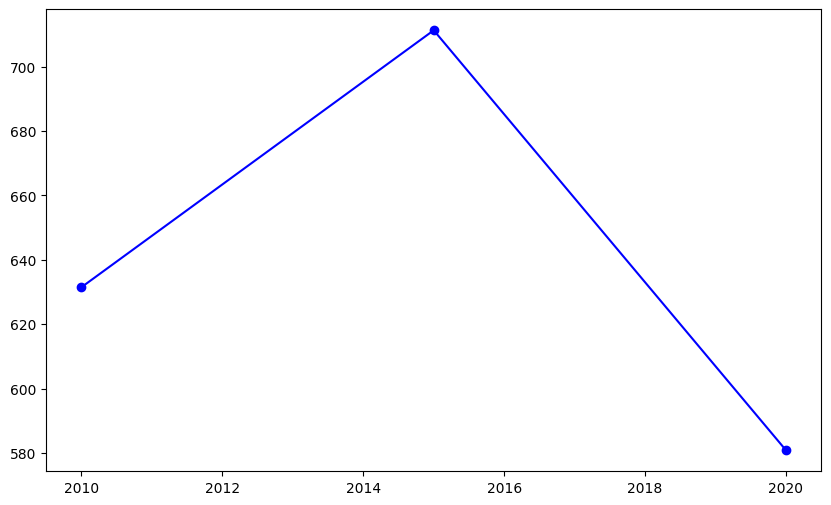

In [50]:
# Filter data for a specific country
afg_data = economies[economies['code'] == 'AFG']

# Line plot of gdp_percapita over the years
plt.figure(figsize=(10, 6))
plt.plot(afg_data['year'], afg_data['gdp_percapita'], 
         marker='o', linestyle='-', color='b')
plt.show();

### Bar chart

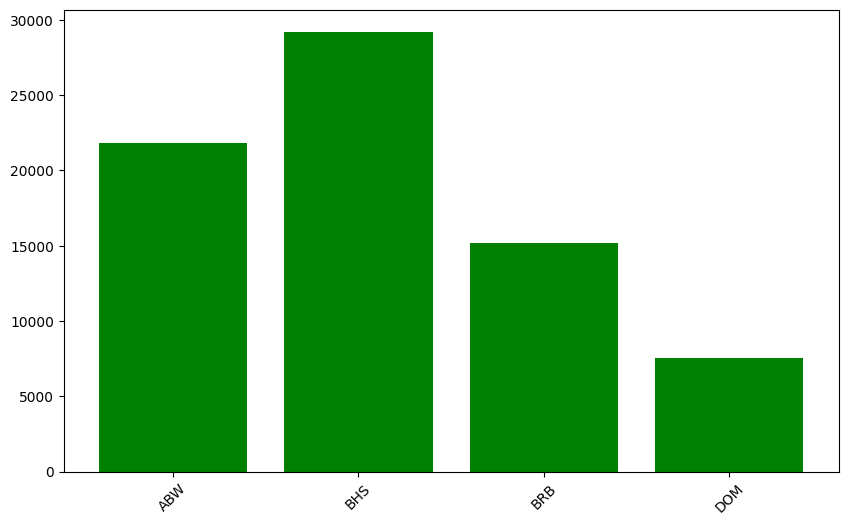

In [51]:
# Filter data for Caribbean countries and the year 2020
caribbean_countries = ['ABW', 'BHS', 'BRB', 'DOM']
data_2020_caribbean = economies[(economies['year'] == 2020) & (economies['code'].isin(caribbean_countries))]

# Bar chart of gdp_percapita for different Caribbean countries in 2020
plt.figure(figsize=(10, 6))
plt.bar(data_2020_caribbean['code'], data_2020_caribbean['gdp_percapita'], color='g')
plt.xticks(rotation=45)
plt.show();

### Adding labels and titles

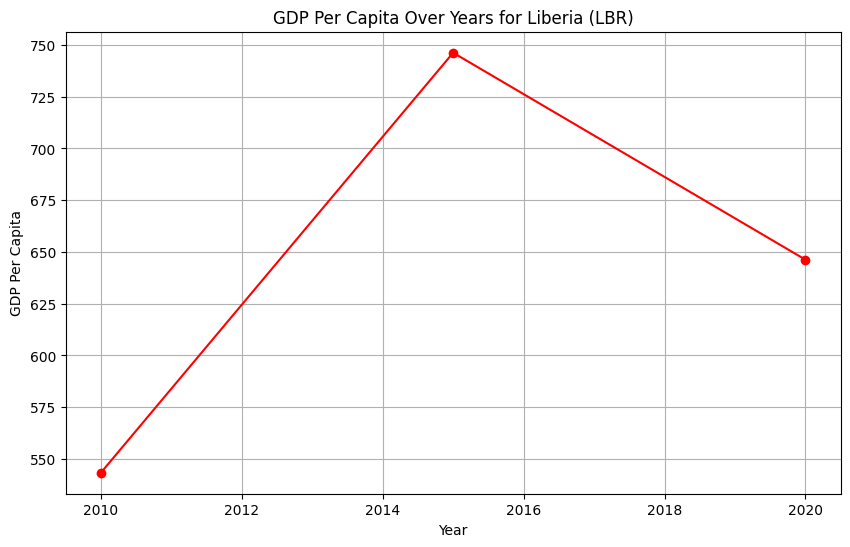

In [52]:
# Filter data for a specific country
liberia_data = economies[economies['code'] == 'LBR']

# Line plot of gdp_percapita over the years with labels and titles
plt.figure(figsize=(10, 6))
plt.plot(liberia_data['year'], liberia_data['gdp_percapita'], marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita Over Years for Liberia (LBR)')
plt.grid(True)
plt.show();

### Adjusting axes and tick marks

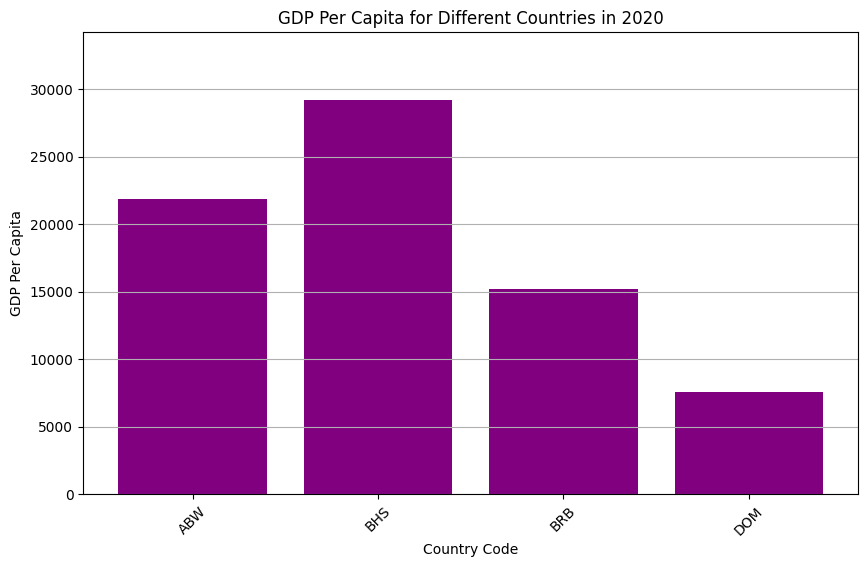

In [53]:
# Bar chart of gdp_percapita for different Caribbean countries in 2020 with 
# adjusted axes and tick marks
plt.figure(figsize=(10, 6))
plt.bar(data_2020_caribbean['code'], data_2020_caribbean['gdp_percapita'], color='purple')
plt.xlabel('Country Code')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita for Different Countries in 2020')

# Adjust axes
plt.ylim(0, max(data_2020_caribbean['gdp_percapita']) + 5000)

# Adjust tick marks
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(data_2020_caribbean['gdp_percapita']) + 5000), 5000))

plt.grid(axis='y')
plt.show();

## Exercise #5: Creating Basic Plots with Matplotlib

By completing this exercise, you will be able to use `matplotlib` to  
- Create line plots and bar charts  
- Add labels and titles  
- Adjust axes and tick marks  

### Line Plot

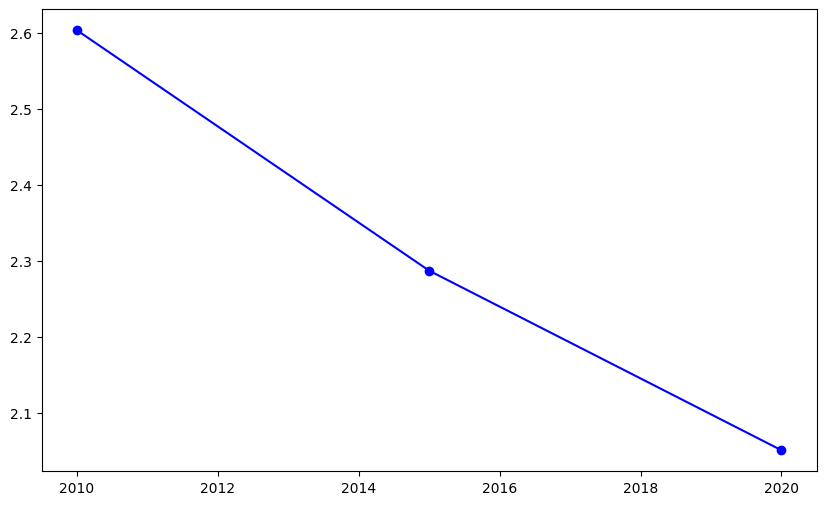

In [54]:
import matplotlib.pyplot as plt

# Filter data for India
india_data = populations[populations['country_code'] == 'IND']

# Line plot of fertility rate over the years
plt.figure(figsize=(10, 6))
plt.plot(india_data['year'], india_data['fertility_rate'], marker='o', linestyle='-', color='b')
plt.show();

### Bar Chart

In [55]:
import plotly.graph_objects as go
import plotly.io as pio


fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()


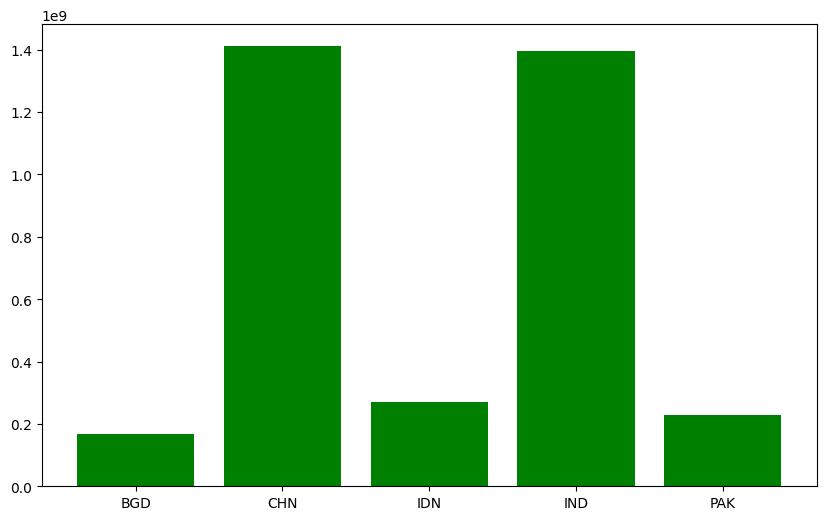

In [56]:
# Filter data for selected Asian countries and the year 2020
asian_countries = ['CHN', 'IND', 'IDN', 'PAK', 'BGD']
data_2020_asia = populations[(populations['year'] == 2020) & (populations['country_code'].isin(asian_countries))]

# Bar chart of population size for selected Asian countries in 2020
plt.figure(figsize=(10, 6))
plt.bar(data_2020_asia['country_code'], data_2020_asia['size'], color='g')
plt.show();

### Adding Labels and Titles

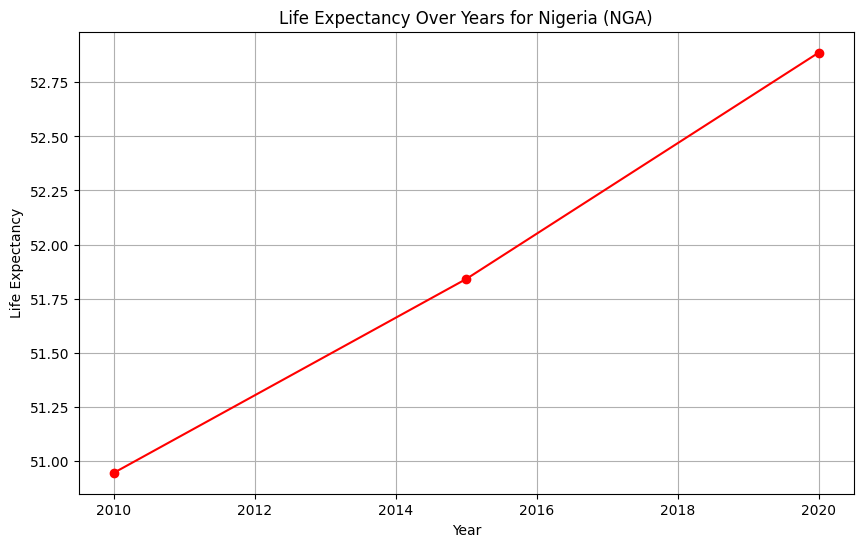

In [57]:
# Filter data for Nigeria
nigeria_data = populations[populations['country_code'] == 'NGA']

# Line plot of life expectancy over the years with labels and titles
plt.figure(figsize=(10, 6))
plt.plot(nigeria_data['year'], nigeria_data['life_expectancy'], 
         marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Years for Nigeria (NGA)')
plt.grid(True)
plt.show();

### Adjusting Axes and Tick Marks

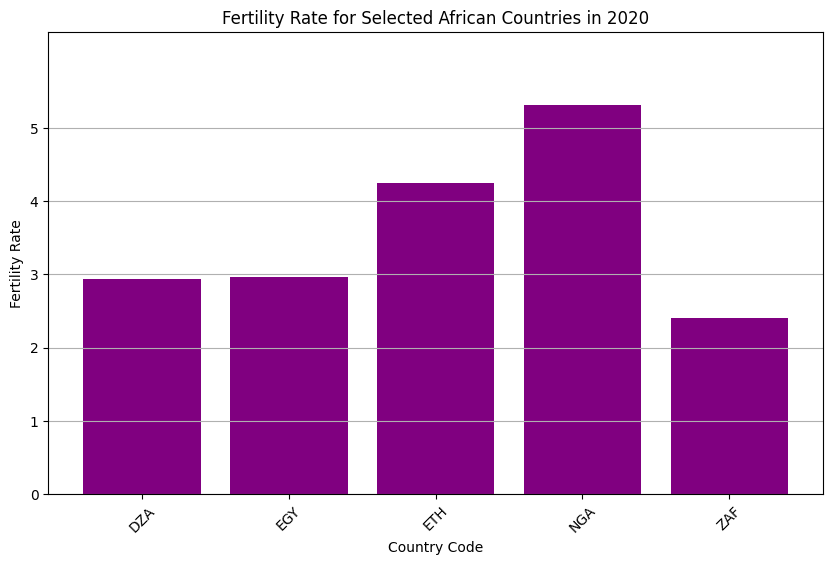

In [58]:
# Filter data for selected African countries ('NGA', 'ETH', 'EGY', 'ZAF', 'DZA')
# and the year 2020
african_countries = ['NGA', 'ETH', 'EGY', 'ZAF', 'DZA']

# Need to convert year back to an integer?
populations['year'] = populations['year'].astype(int)

data_2020_africa = populations[(populations['year'] == 2020) & (populations['country_code'].isin(african_countries))]

# Bar chart of fertility rate for selected African countries in 2020 with 
# adjusted axes and tick marks
plt.figure(figsize=(10, 6))
plt.bar(data_2020_africa['country_code'], data_2020_africa['fertility_rate'], color='purple')
plt.xlabel('Country Code')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate for Selected African Countries in 2020')

# Adjust axes
plt.ylim(0, max(data_2020_africa['fertility_rate']) + 1)

# Adjust tick marks
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(data_2020_africa['fertility_rate']) + 1), 1))

plt.grid(axis='y')
plt.show();

## Walkthrough #6: Data Visualization Techniques with Seaborn

### Heatmap

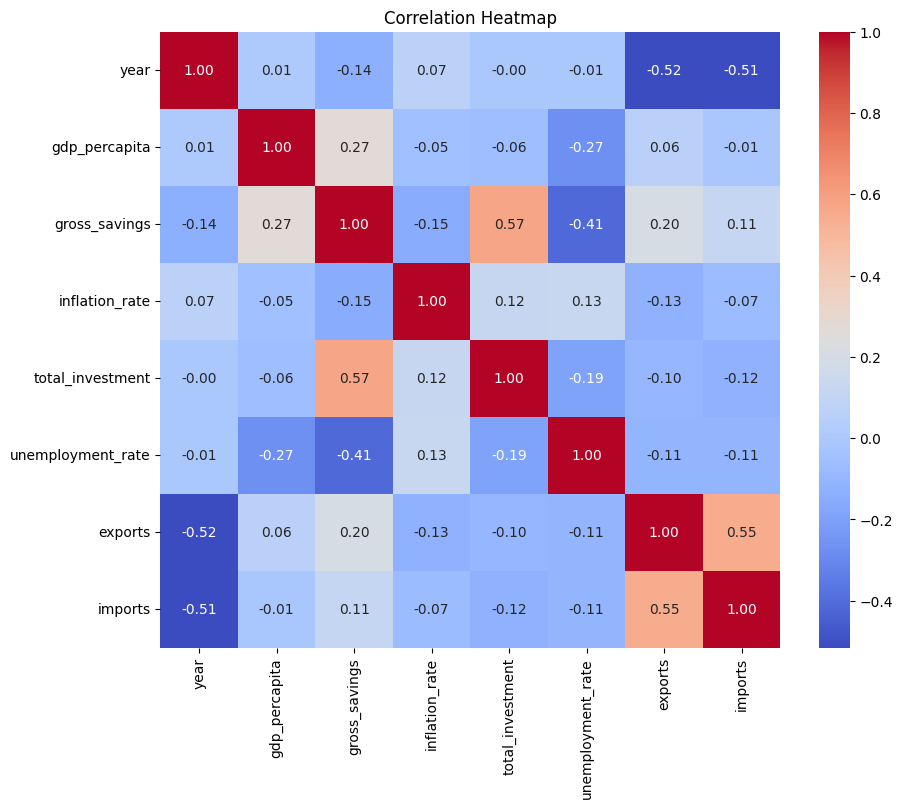

In [59]:
# Select only the numeric columns
numeric_cols = economies.select_dtypes(include=['float64', 'int64']).columns
numeric_economies = economies[numeric_cols]

# Calculate correlation matrix
corr_matrix = numeric_economies.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show();

### Pair plot

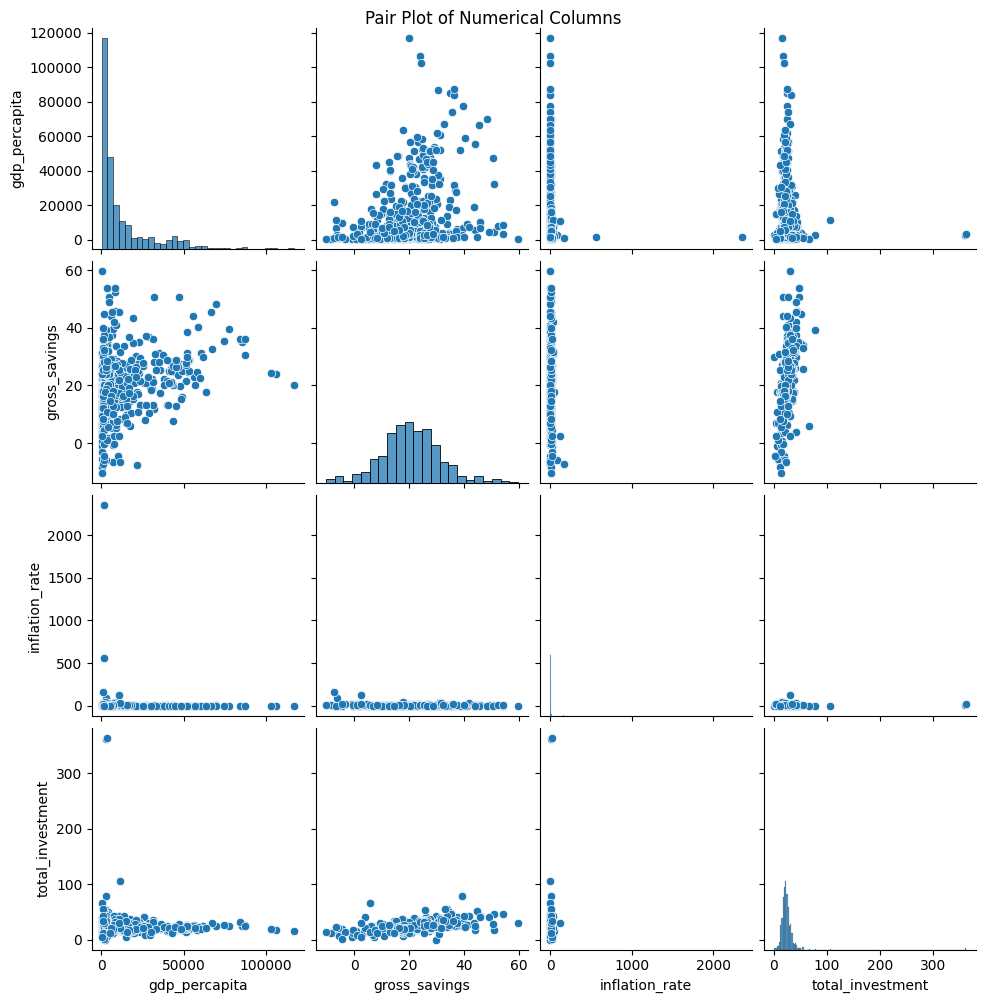

In [60]:
sns.pairplot(economies, vars=['gdp_percapita', 'gross_savings', 'inflation_rate', 'total_investment'])
plt.suptitle('Pair Plot of Numerical Columns', y=1)
plt.show();

### Violin plot

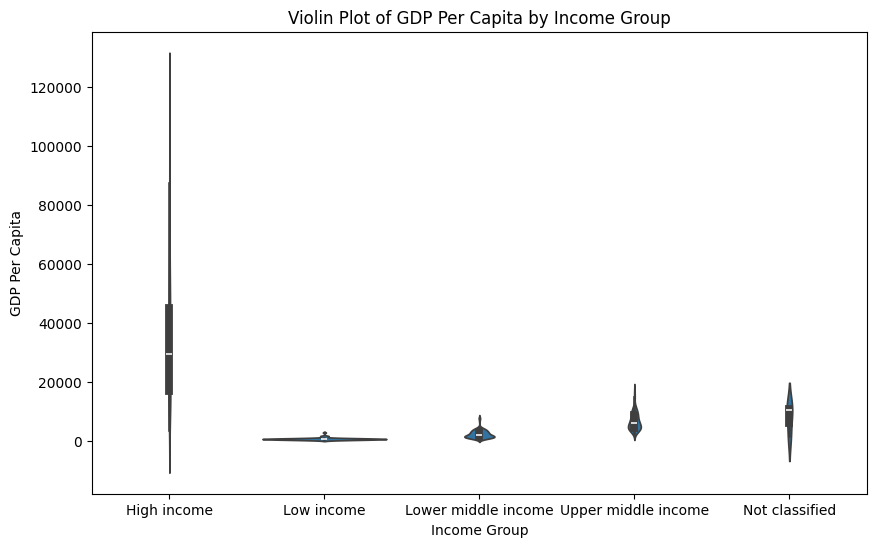

In [61]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='income_group', y='gdp_percapita', data=economies)
plt.xlabel('Income Group')
plt.ylabel('GDP Per Capita')
plt.title('Violin Plot of GDP Per Capita by Income Group')
plt.show();

### Customizing Seaborn plots

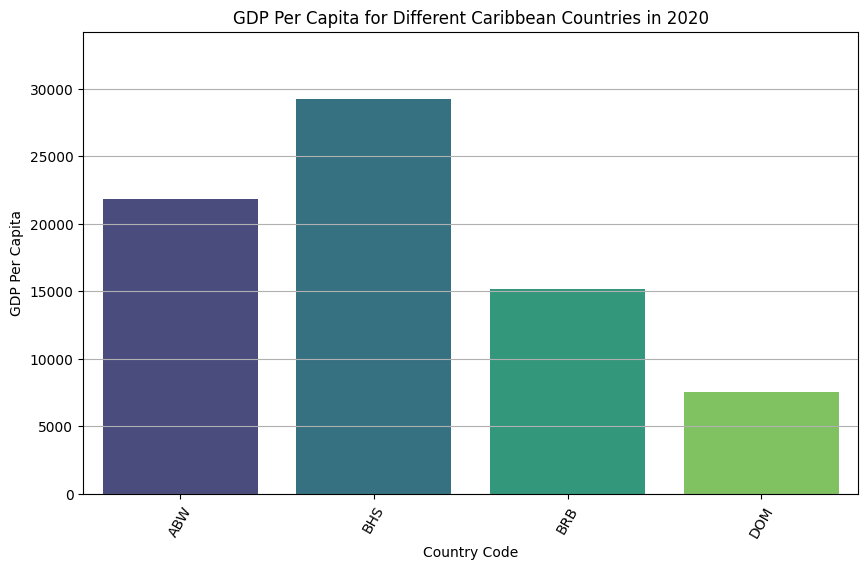

In [62]:
# Bar plot with customization
plt.figure(figsize=(10, 6))
sns.barplot(x='code', y='gdp_percapita', hue='code', data=data_2020_caribbean, palette='viridis')
plt.xlabel('Country Code')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita for Different Caribbean Countries in 2020')

# Customizing axes and tick marks
plt.ylim(0, max(data_2020_caribbean['gdp_percapita']) + 5000)
plt.xticks(rotation=60)
plt.yticks(range(0, int(max(data_2020_caribbean['gdp_percapita']) + 5000), 5000))

plt.grid(axis='y')
plt.show();

## Exercise #6: Data Visualization Techniques with Seaborn

By completing this exercise, you will be able to use `seaborn` to  
- Create heatmaps  
- Design pair plots and violin plots  
- Customize Seaborn plots  

### Heatmap

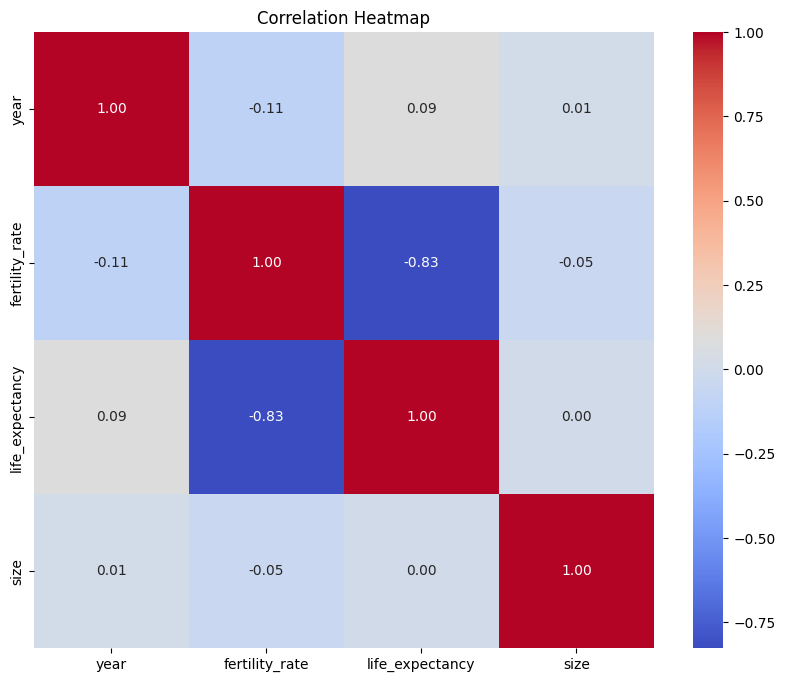

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns
numeric_cols = populations.select_dtypes(include=['float64', 'int64']).columns
numeric_populations = populations[numeric_cols]

# Calculate correlation matrix
pop_corr_matrix = numeric_populations.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pop_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show();

### Pair Plot

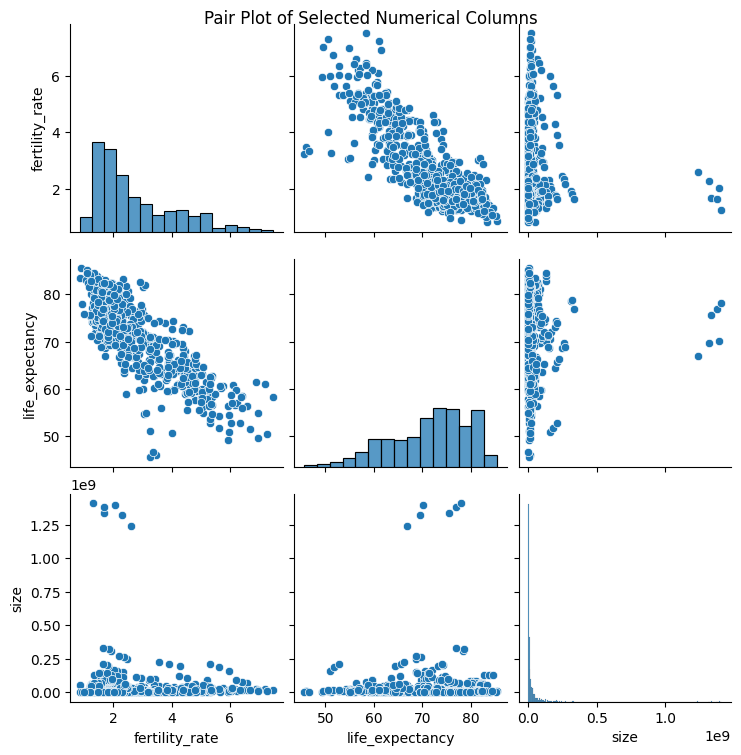

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot of fertility rate, life expectancy, and population size
sns.pairplot(populations, vars=['fertility_rate', 'life_expectancy', 'size'])
plt.suptitle('Pair Plot of Selected Numerical Columns', y=1)
plt.show();

### Violin Plot

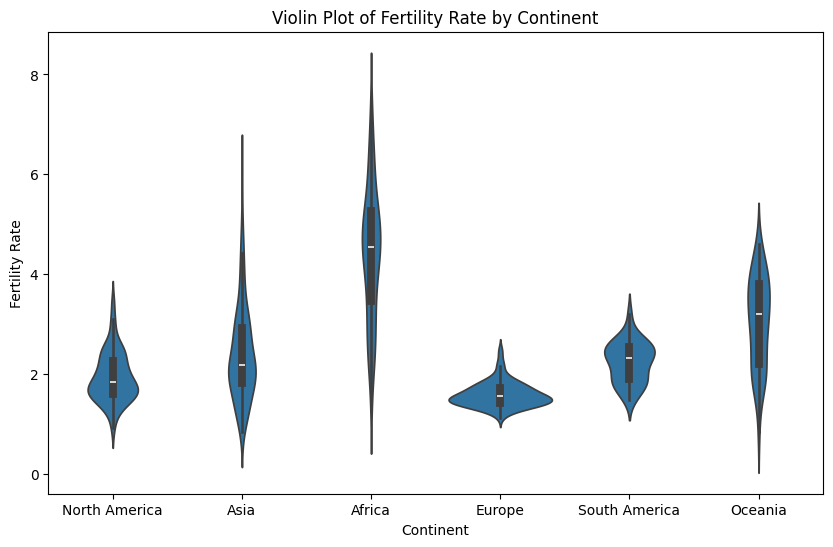

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot of fertility rate by continent
plt.figure(figsize=(10, 6))
sns.violinplot(x='continent', y='fertility_rate', data=populations)
plt.xlabel('Continent')
plt.ylabel('Fertility Rate')
plt.title('Violin Plot of Fertility Rate by Continent')
plt.show();

### Customizing Seaborn Plots

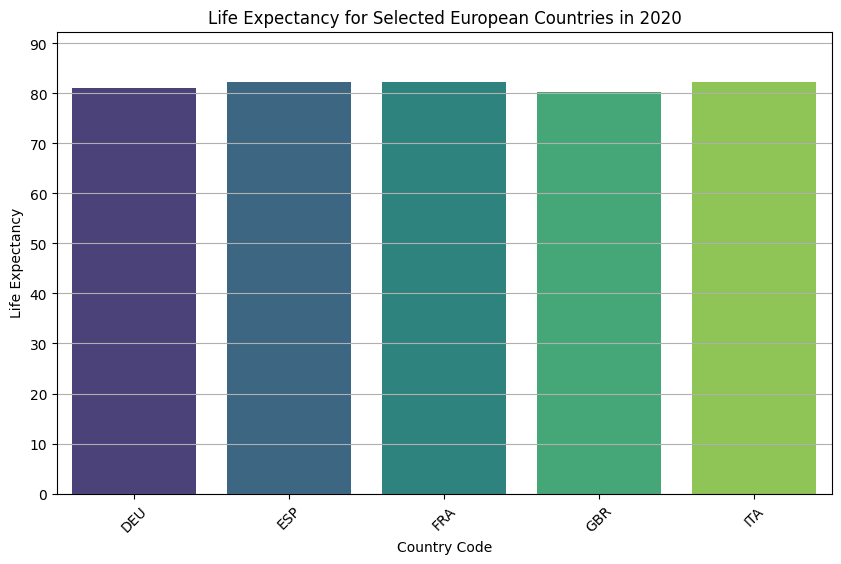

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for selected European countries ('DEU', 'FRA', 'ITA', 'ESP', 'GBR')
# and the year 2020
european_countries = ['DEU', 'FRA', 'ITA', 'ESP', 'GBR']
data_2020_europe = populations[(populations['year'] == 2020) & (populations['country_code'].isin(european_countries))]

# Bar plot with customization
plt.figure(figsize=(10, 6))
sns.barplot(x='country_code', y='life_expectancy', hue='country_code', data=data_2020_europe, palette='viridis')
plt.xlabel('Country Code')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy for Selected European Countries in 2020')

# Customizing axes and tick marks
plt.ylim(0, max(data_2020_europe['life_expectancy']) + 10)
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(data_2020_europe['life_expectancy']) + 10), 10))

plt.grid(axis='y')
plt.show();

---

# Module 3: Interactive Data Visualization with Plotly

## Walkthrough #7: Interactive Charts and Dashboards with Plotly

### Basic interactive chart

In [67]:
# Filter data for a specific country
afg_data = economies[economies['code'] == 'AFG']

# Create an interactive line chart
fig = px.line(afg_data, x='year', y='gdp_percapita', title='GDP Per Capita Over Years for Afghanistan (AFG)')
fig.show();

### Adding interactive elements

In [68]:
# Create an interactive scatter plot
fig = px.scatter(economies, x='gdp_percapita', y='gross_savings', color='income_group',
                 hover_name='code', title='GDP Per Capita vs. Gross Savings',
                 labels={'gdp_percapita': 'GDP Per Capita', 'gross_savings': 'Gross Savings (%)'})

# Add hover, zoom, and selection tools
fig.update_traces(marker=dict(size=10), selector=dict(mode='markers'))
fig.update_layout(hovermode='closest')

fig.show();

### Designing a simple dashboard

In [69]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for the year 2020
data_2020 = economies[economies['year'] == 2020]

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('GDP Per Capita Over Years for Afghanistan', 
                                    'GDP Per Capita for Different Countries in 2020'))

# Line chart of GDP Per Capita for Afghanistan
afg_data = economies[economies['code'] == 'AFG']
line_chart = go.Scatter(x=afg_data['year'], y=afg_data['gdp_percapita'], mode='lines+markers', name='Afghanistan')
fig.add_trace(line_chart, row=1, col=1)

# Bar chart of GDP Per Capita for different countries in 2020
bar_chart = go.Bar(x=data_2020['code'], y=data_2020['gdp_percapita'], name='2020')
fig.add_trace(bar_chart, row=1, col=2)

# Update layout
fig.update_layout(title_text='Simple Dashboard with Multiple Charts', showlegend=False)
fig.show();

## Exercise #7: Interactive Charts and Dashboards with Plotly

By completing this exercise, you will be able to use `plotly` to  
- Create a basic interactive chart  
- Add interactive elements: hover, zoom, and selection tools  
- Design a simple dashboard with multiple charts  

### Basic Interactive Chart

In [70]:
import plotly.express as px

# Filter data for a specific country (Brazil)
bra_data = populations[populations['country_code'] == 'BRA']

# Create an interactive line chart (Fertility Rate Over Years)
fig = px.line(bra_data, x='year', y='fertility_rate', title='Fertility Rate Over Years for Brazil (BRA)')
fig.show();

### Adding Interactive Elements

In [71]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(populations, x='fertility_rate', y='life_expectancy', color='continent',
                 hover_name='country', title='Fertility Rate vs. Life Expectancy',
                 labels={'fertility_rate': 'Fertility Rate', 'life_expectancy': 'Life Expectancy'})

# Add hover, zoom, and selection tools
fig.update_traces(marker=dict(size=10), selector=dict(mode='markers'))
fig.update_layout(hovermode='closest')

fig.show();

### Designing a Simple Dashboard

In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter data for the year 2020
data_2020 = populations[populations['year'] == 2020]

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, subplot_titles=('Life Expectancy Over Years for Brazil', 'Life Expectancy for Different Countries in 2020'))

# Line chart of Life Expectancy for Brazil
bra_data = populations[populations['country_code'] == 'BRA']
line_chart = go.Scatter(x=bra_data['year'], y=bra_data['life_expectancy'], mode='lines+markers', name='Brazil')
fig.add_trace(line_chart, row=1, col=1)

# Bar chart of Life Expectancy for South American countries in 2020
south_american_data_2020 = data_2020[data_2020['continent'] == 'South America']
bar_chart = go.Bar(x=south_american_data_2020['country'], y=south_american_data_2020['life_expectancy'], name='2020')
fig.add_trace(bar_chart, row=1, col=2)

# Update layout to add a title and hide the legend
fig.update_layout(title_text='Simple Dashboard with Multiple Charts', showlegend=False)
fig.show();

## Walkthrough #8: Creating a Dynamic Data Report

### Selecting relevant data

In [73]:
# Select relevant data for the year 2020 and specific columns
selected_data = economies[economies['year'] == 2020][['code', 'gdp_percapita', 'gross_savings', 'inflation_rate', 'income_group']]
selected_data.head()

,code,gdp_percapita,gross_savings,inflation_rate,income_group
2,ABW,21832.920,-7.521,-1.338,High income
5,AFG,580.817,27.132,5.607,Low income
8,AGO,2012.150,22.399,22.277,Lower middle income
11,ALB,5286.680,13.255,1.603,Upper middle income
14,ARE,31982.230,28.223,-2.074,High income


### Building a dynamic report

In [74]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 3 rows
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=('GDP Per Capita vs. Gross Savings', 
                                    'GDP Per Capita by Country and Income Group', 
                                    'Gross Savings by Country and Income Group'))

# Add scatter plot
fig.add_trace(go.Scatter(x=selected_data['gdp_percapita'], y=selected_data['gross_savings'], 
                         mode='markers', 
                         marker=dict(color=selected_data['income_group'].astype('category').cat.codes), 
                         text=selected_data['code'], name='Scatter'), 
              row=1, col=1)

# Add bar chart
fig.add_trace(go.Bar(x=selected_data['code'], y=selected_data['gdp_percapita'], 
                     marker=dict(color=selected_data['income_group'].astype('category').cat.codes), name='Bar'), 
              row=2, col=1)

# Add another scatter plot
fig.add_trace(go.Scatter(x=selected_data['code'], y=selected_data['gross_savings'], 
                         mode='markers', 
                         marker=dict(color=selected_data['income_group'].astype('category').cat.codes), text=selected_data['code'], name='Scatter'), 
              row=3, col=1)

# Update layout
fig.update_layout(title_text='Dynamic Data Report for Economic Indicators (2020)', showlegend=False, height=900)

fig.show();

### Adding contextual text and summaries

In [75]:
import plotly.io as pio
import plotly.graph_objects as go

# Create a subplot figure with 3 rows
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=('GDP Per Capita vs. Gross Savings', 
                                    'GDP Per Capita by Country and Income Group', 
                                    'Gross Savings by Country and Income Group'))

# Add scatter plot
fig.add_trace(go.Scatter(x=selected_data['gdp_percapita'], y=selected_data['gross_savings'], 
                         mode='markers', 
                         marker=dict(color=selected_data['income_group'].astype('category').cat.codes), 
                         text=selected_data['code'], name='Scatter'), 
              row=1, col=1)

# Add bar chart
fig.add_trace(go.Bar(x=selected_data['code'], y=selected_data['gdp_percapita'], 
                     marker=dict(color=selected_data['income_group'].astype('category').cat.codes), name='Bar'), 
              row=2, col=1)

# Add another scatter plot
fig.add_trace(go.Scatter(x=selected_data['code'], y=selected_data['gross_savings'], 
                         mode='markers', 
                         marker=dict(color=selected_data['income_group'].astype('category').cat.codes), 
                         text=selected_data['code'], name='Scatter'), 
              row=3, col=1)

# Update layout
fig.update_layout(
    title_text='Dynamic Data Report for Economic Indicators (2020)', 
    showlegend=False, 
    height=900,
    annotations=[
        go.layout.Annotation(
            text='''This report presents key economic indicators for various countries in 2020, categorized by income group. ''', 
            xref='paper', yref='paper', x=0.5, y=1, showarrow=False, font=dict(size=14)
        )
    ]
)

# Add summaries below each subplot
fig.add_annotation(text='The scatter plot reveals a positive correlation between GDP per Capita and Gross Savings, especially for high-income countries.', xref='paper', yref='paper', x=0, y=0.75, showarrow=False, font=dict(size=12))
fig.add_annotation(text='The bar chart shows that high-income countries generally have higher GDP per Capita compared to low-income countries.', xref='paper', yref='paper', x=0, y=0.30, showarrow=False, font=dict(size=12))
fig.add_annotation(text='The scatter plot indicates no clear relationship between income group and gross savings.', xref='paper', yref='paper', x=0, y=-0.1, showarrow=False, font=dict(size=12))

fig.show();

## Exercise #8: Creating a Dynamic Data Report

By completing this exercise, you will be able to use `pandas` and `plotly` to  
- Select relevant data  
- Build a dynamic report  
- Add contextual text and summaries  

### Selecting Relevant Data

In [76]:
# Select relevant data for the year 2020 and specific columns (country_code, fertility_rate, life_expectancy, continent)
pop_selected_data = populations[populations['year'] == 2020][['country_code', 'fertility_rate', 'life_expectancy', 'continent']]
pop_selected_data.head()

,country_code,fertility_rate,life_expectancy,continent
2,ABW,1.325,75.723,North America
5,AFG,4.750,62.575,Asia
8,AGO,5.371,62.261,Africa
11,ALB,1.400,76.989,Europe
14,AND,NaN,NaN,Europe


### Building a Dynamic Report

In [77]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 3 rows and subplot titles
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=('Fertility Rate vs. Life Expectancy', 
                                    'Fertility Rate by Country and Continent', 
                                    'Life Expectancy by Country and Continent'))

# Adding a scatter plot trace to the figure
# - x-axis: 'fertility_rate' from the selected population data
# - y-axis: 'life_expectancy' from the selected population data
# - mode: 'markers' to display points
# - marker color: based on the 'continent' category codes, to differentiate points by continent
# - text: 'country_code' to show country codes on hover
# - name: 'Scatter' to label this trace
# The trace is added to the first row and first column of the subplot grid
fig.add_trace(go.Scatter(x=pop_selected_data['fertility_rate'], y=pop_selected_data['life_expectancy'], 
                         mode='markers', 
                         marker=dict(color=pop_selected_data['continent'].astype('category').cat.codes), 
                         text=pop_selected_data['country_code'], name='Scatter'), 
              row=1, col=1)

# Adding a bar chart trace to the figure
# - x-axis: 'country_code' from the selected population data
# - y-axis: 'fertility_rate' from the selected population data
# - marker color: based on the 'continent' category codes, to differentiate bars by continent
# - name: 'Bar' to label this trace
# The trace is added to the second row and first column of the subplot grid
fig.add_trace(go.Bar(x=pop_selected_data['country_code'], y=pop_selected_data['fertility_rate'], 
                     marker=dict(color=pop_selected_data['continent'].astype('category').cat.codes), name='Bar'), 
              row=2, col=1)

# Adding a scatter plot trace to the figure
# - x-axis: 'country_code' from the selected population data
# - y-axis: 'life_expectancy' from the selected population data
# - mode: 'markers' to display points
# - marker color: based on the 'continent' category codes, to differentiate points by continent
# - name: 'Scatter' to label this trace
# The trace is added to the third row and first column of the subplot grid
fig.add_trace(go.Scatter(x=pop_selected_data['country_code'], y=pop_selected_data['life_expectancy'], 
                         mode='markers', 
                         marker=dict(color=pop_selected_data['continent'].astype('category').cat.codes), name='Scatter'), 
              row=3, col=1)

# Update layout to include title, hide legend, and set height to 900
fig.update_layout(title_text='Dynamic Data Report for Population Indicators (2020)', showlegend=False, height=900)

fig.show();

### Adding Contextual Text and Summaries

In [78]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 3 rows
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=('Fertility Rate vs. Life Expectancy', 
                                    'Fertility Rate by Country and Continent', 
                                    'Life Expectancy by Country and Continent'))

# Add scatter plot
fig.add_trace(go.Scatter(x=pop_selected_data['fertility_rate'], y=pop_selected_data['life_expectancy'], 
                         mode='markers', 
                         marker=dict(color=pop_selected_data['continent'].astype('category').cat.codes), 
                         text=pop_selected_data['country_code'], name='Scatter'), 
              row=1, col=1)

# Add bar chart
fig.add_trace(go.Bar(x=pop_selected_data['country_code'], y=pop_selected_data['fertility_rate'], 
                     marker=dict(color=pop_selected_data['continent'].astype('category').cat.codes), name='Bar'), 
              row=2, col=1)

# Add another scatter plot
fig.add_trace(go.Scatter(x=pop_selected_data['country_code'], y=pop_selected_data['life_expectancy'], 
                         mode='markers', 
                         marker=dict(color=pop_selected_data['continent'].astype('category').cat.codes), name='Scatter'), 
              row=3, col=1)


# Update layout
fig.update_layout(
    title_text='Dynamic Data Report for Population Indicators (2020)', 
    showlegend=False, 
    height=900,
    annotations=[
        go.layout.Annotation(
            text='''This report presents key population-based indicators for various countries in 2020, categorized by continent. ''', 
            xref='paper', yref='paper', x=0.5, y=1, showarrow=False, font=dict(size=14)
        )
    ]
)

# Add summaries below each subplot
fig.add_annotation(text='A negative correlation between Fertility Rate and Life Expectancy.', xref='paper', yref='paper', x=0, y=0.75, showarrow=False, font=dict(size=12))
fig.add_annotation(text='Fertility rates vary significantly across countries, with African countries generally exhibiting higher fertility rates.', xref='paper', yref='paper', x=0, y=0.30, showarrow=False, font=dict(size=12))
fig.add_annotation(text='Life expectancy varies across countries and continents, with European tending to have higher life expectancies.', xref='paper', yref='paper', x=0, y=-0.1, showarrow=False, font=dict(size=12))

fig.show();

---

# Module 4: Real-World Data Analysis Project

## Walkthrough #9: Interactive Charts and Dashboards with Plotly

### Selecting a Dataset

#### Questions to Ask:
1. **What industry problem or area of interest does the dataset align with?**
   - Is the dataset relevant to economic analysis, market research, policy planning, or another industry?
2. **Does the dataset provide sufficient complexity and scope for a thorough analysis?**
   - Does it include multiple variables and data points across different time periods and categories (e.g., income groups, countries)?
3. **What specific questions or hypotheses do we want to explore with this dataset?**
   - Are we interested in comparing economic indicators across countries, understanding the impact of GDP per capita on other variables, or identifying trends over time?

#### Example:
- **Dataset**: The `economies` dataset.
- **Industry Problem**: Understanding economic disparities between countries and the impact of economic indicators on overall economic health.
- **Specific Questions**:
  - How do GDP per capita and gross savings vary across different income groups?
  - How has the inflation rate changed over time for specified income groups?

### Applying Cleaning, Transforming, and Analysis Techniques

#### Questions to Ask:
1. **What cleaning steps are necessary to prepare the data for analysis?**
   - Are there any missing values that need to be handled? Are there any inconsistencies in data types?
2. **What transformations are required to make the data analysis-ready?**
   - Do we need to create new columns, filter specific rows, or aggregate data by certain categories?
3. **How can we analyze the data to uncover patterns, trends, or anomalies?**
   - What statistical methods or visualizations can we use to explore relationships between variables?

#### Example:
- **Cleaning**:

In [79]:
# Handle missing values
economies_cleaned = economies.fillna({
    'gdp_percapita': economies['gdp_percapita'].mean(),
    'gross_savings': economies['gross_savings'].mean(),
    'inflation_rate': economies['inflation_rate'].mean(),
    'total_investment': economies['total_investment'].mean(),
    'unemployment_rate': economies['unemployment_rate'].mean(),
    'exports': economies['exports'].mean(),
    'imports': economies['imports'].mean()
})

# Convert categorical variables to category type
economies_cleaned['income_group'] = economies_cleaned['income_group'].astype('category')
economies_cleaned

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group
0,ABW,Aruba,2010,24087.950,13.255000,2.078,25.348976,10.600000,-0.844275,0.813121,High income
1,ABW,Aruba,2015,27126.620,21.411000,0.475,25.348976,7.298000,-0.844275,0.813121,High income
2,ABW,Aruba,2020,21832.920,-7.521000,-1.338,25.348976,13.997000,-0.844275,0.813121,High income
3,AFG,Afghanistan,2010,631.490,59.699000,2.179,30.269000,8.894619,9.768000,32.285000,Low income
4,AFG,Afghanistan,2015,711.337,22.223000,-0.662,18.427000,8.894619,-11.585000,15.309000,Low income
...,...,...,...,...,...,...,...,...,...,...,...
556,ZMB,Zambia,2015,1310.460,40.103000,10.107,42.791000,8.894619,-11.407000,0.696000,Lower middle income
557,ZMB,Zambia,2020,981.311,36.030000,16.350,34.514000,8.894619,1.143000,2.635000,Lower middle income
558,ZWE,Zimbabwe,2010,975.851,20.641665,3.045,25.348976,8.894619,-0.844275,0.813121,Lower middle income
559,ZWE,Zimbabwe,2015,1425.010,20.641665,-2.410,25.348976,8.894619,-0.844275,0.813121,Lower middle income


- **Transforming**:

In [80]:
# Create new columns for analysis
economies_cleaned['gdp_growth'] = economies_cleaned.groupby('code')['gdp_percapita'].pct_change()
economies_cleaned

,code,country,year,gdp_percapita,gross_savings,inflation_rate,total_investment,unemployment_rate,exports,imports,income_group,gdp_growth
0,ABW,Aruba,2010,24087.950,13.255000,2.078,25.348976,10.600000,-0.844275,0.813121,High income,NaN
1,ABW,Aruba,2015,27126.620,21.411000,0.475,25.348976,7.298000,-0.844275,0.813121,High income,0.126149
2,ABW,Aruba,2020,21832.920,-7.521000,-1.338,25.348976,13.997000,-0.844275,0.813121,High income,-0.195148
3,AFG,Afghanistan,2010,631.490,59.699000,2.179,30.269000,8.894619,9.768000,32.285000,Low income,NaN
4,AFG,Afghanistan,2015,711.337,22.223000,-0.662,18.427000,8.894619,-11.585000,15.309000,Low income,0.126442
...,...,...,...,...,...,...,...,...,...,...,...,...
556,ZMB,Zambia,2015,1310.460,40.103000,10.107,42.791000,8.894619,-11.407000,0.696000,Lower middle income,-0.099990
557,ZMB,Zambia,2020,981.311,36.030000,16.350,34.514000,8.894619,1.143000,2.635000,Lower middle income,-0.251171
558,ZWE,Zimbabwe,2010,975.851,20.641665,3.045,25.348976,8.894619,-0.844275,0.813121,Lower middle income,NaN
559,ZWE,Zimbabwe,2015,1425.010,20.641665,-2.410,25.348976,8.894619,-0.844275,0.813121,Lower middle income,0.460274


- **Analyzing**:

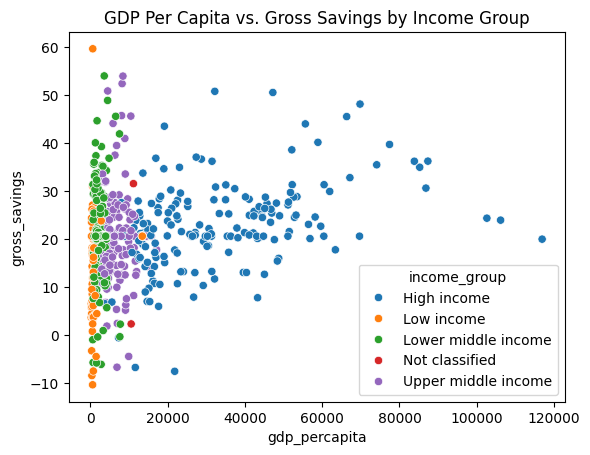

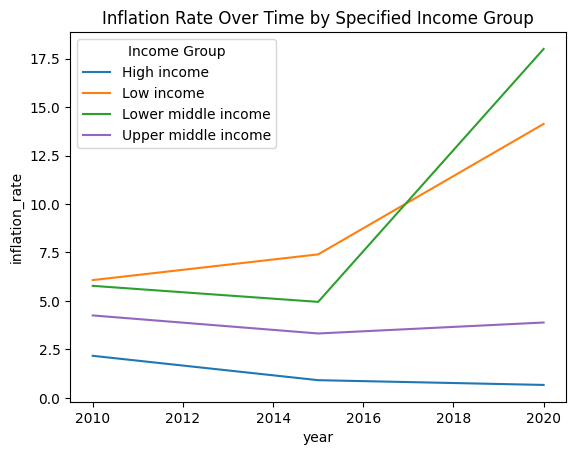

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.clf()

# Analyze the relationship between GDP per capita and gross savings
sns.scatterplot(data=economies_cleaned, x='gdp_percapita', y='gross_savings', hue='income_group')
plt.title('GDP Per Capita vs. Gross Savings by Income Group')
plt.show()
plt.clf()

# Analyze the trend of inflation rate over time for all classified income groups
classified_data = economies_cleaned[economies_cleaned['income_group'] != 'Not classified']
sns.lineplot(data=classified_data, x='year', y='inflation_rate', 
             hue='income_group', errorbar=None)
plt.title('Inflation Rate Over Time by Specified Income Group')
plt.legend(title='Income Group', labels=classified_data['income_group'].unique())
plt.show();

### Initial Findings and Interpretation

#### Questions to Ask:
1. **What do the initial findings tell us about the data?**
   - Are there any notable patterns or trends in the data? Are there any unexpected results?
2. **How do these insights relate to the problem defined earlier?**
   - Do the findings help us understand economic disparities between countries? Do they provide insights into the impact of certain economic indicators?
3. **What hypotheses can we test based on the initial results?**
   - Can we test hypotheses about the relationship between GDP per capita and other economic indicators? Can we refine our analysis to explore these hypotheses further?

#### Example:
- **Initial Findings**:
  - **GDP per Capita vs. Gross Savings**: The scatter plot shows that high-income countries generally have higher GDP per capita and gross savings. There seems to be a slight positive correlation between these two indicators.
  - **Inflation Rate Over Time**: The line plot indicates that inflation rates vary significantly over time and across different income groups. Low and lower middle income countries tend to experience higher volatility in inflation rates.

- **Interpretation**:
  - These findings suggest that economic health, as measured by GDP per capita and gross savings, is strongly influenced by the income group of a country. High-income countries appear to have more stable and higher economic performance.
  - The volatility in inflation rates among low-income countries may indicate economic instability, which could be a key area for policy intervention.

- **Hypotheses**:
  - **Hypothesis 1**: High-income countries have a higher average GDP per capita and gross savings compared to low-income countries.
  - **Hypothesis 2**: Low-income countries experience greater volatility in inflation rates compared to high-income countries.

- **Next Steps**:
  - Conduct further analysis to test these hypotheses, using statistical methods to confirm the observed patterns.
  - Explore other economic indicators to gain a more comprehensive understanding of economic disparities and trends.

By following these steps, you can effectively select, clean, transform, and analyze the `economies` dataset to gain valuable insights and address common industry problems or research questions.


## Walkthrough #10: Finalizing and Presenting Your Data Analysis Project

### Integrate Feedback to Refine the Analysis

#### Questions to Ask:
1. **What feedback have you received from peers, stakeholders, or mentors?**
   - Is there feedback on the clarity of the analysis, choice of visualizations, or the comprehensiveness of the analysis?
2. **How can you incorporate this feedback into your analysis?**
   - Are there additional variables that need to be analyzed? Do you need to clean the data further or adjust the visualizations?
3. **What new questions or hypotheses have emerged from the feedback?**
   - Does the feedback suggest new directions for the analysis or areas that need more focus?

#### Example:
- **Feedback**:
  - Peers suggested that the analysis should also consider the impact of unemployment rates.
  - Stakeholders requested more clarity on the relationship between GDP per capita and inflation rates across different income groups.

- **Refining the Analysis**:
  - Additional data needs to be found to meet the request for more clarity. Or maybe a further drilldown on specific countries would be helpful?
  
### Finalize the Presentation with Impactful Visuals and Narrative

#### Questions to Ask:
1. **What are the key insights from the analysis that need to be highlighted?**
   - What are the most important findings that should be communicated to the audience?
2. **How can you create impactful visuals that clearly convey these insights?**
   - What types of charts or visualizations best represent the data and findings?
3. **What narrative will you use to guide the audience through the presentation?**
   - How will you structure the presentation to tell a compelling story with the data?

#### Example:
- **Key Insights**:
  - High-income countries have higher GDP per capita and gross savings.
  - There is a positive correlation between GDP per capita and gross savings.
  - Low-income countries experience greater volatility in inflation rates.
  - Unemployment rates vary significantly across income groups.

- **Impactful Visuals**:

In [82]:
import plotly.express as px

# Bar chart of GDP per Capita by Country and Income Group
bar_fig = px.bar(economies_cleaned, x='code', y='gdp_percapita', color='income_group',
                 title='GDP Per Capita by Country and Income Group (2020)',
                 labels={'gdp_percapita': 'GDP Per Capita', 'code': 'Country Code'})
bar_fig.show();

# Scatter plot of GDP per Capita vs. Gross Savings by Income Group
scatter_fig = px.scatter(economies_cleaned, x='gdp_percapita', y='gross_savings', color='income_group',
                         hover_name='code', title='GDP Per Capita vs. Gross Savings (2020)',
                         labels={'gdp_percapita': 'GDP Per Capita', 'gross_savings': 'Gross Savings (%)'})
scatter_fig.show();

# Scatter plot of GDP per Capita vs. Unemployment Rate by Income Group
scatter_fig_2 = px.scatter(economies_cleaned, x='gdp_percapita', y='unemployment_rate', color='income_group',
                           hover_name='code', title='GDP Per Capita vs. Unemployment Rate (2020)',
                           labels={'gdp_percapita': 'GDP Per Capita', 'unemployment_rate': 'Unemployment Rate (%)'})
scatter_fig_2.show();

- **Narrative**:
  - **Introduction**: Introduce the dataset and the industry problem. Explain why understanding economic indicators across different income groups is important.
  - **Key Findings**: Present the key findings using the visualizations created. Highlight the relationship between GDP per capita, gross savings, inflation rates, and unemployment rates.
  - **Detailed Analysis**: Dive deeper into each key finding, providing more context and interpretation. Explain the significance of the trends and patterns observed in the data.
  - **Conclusion**: Summarize the insights and discuss potential implications for policy or business decisions. Suggest areas for further research or analysis based on the findings.

### Rehearse the Presentation

#### Questions to Ask:
1. **How will you structure your presentation to ensure a smooth flow?**
   - What order will you present the visualizations and insights? How will you transition between different sections?
2. **How will you engage your audience and ensure they understand the key points?**
   - What techniques will you use to highlight important information and keep the audience's attention?
3. **What potential questions or feedback might you receive, and how will you address them?**
   - How will you prepare for questions about the data, analysis methods, or findings?

#### Example:
- **Structuring the Presentation**:
  - Start with an overview of the dataset and the industry problem.
  - Move on to the key findings, using the most impactful visualizations to illustrate each point.
  - Provide a detailed analysis of each finding, explaining the significance and implications.
  - Conclude with a summary of insights and suggestions for further research.

- **Engaging the Audience**:
  - Use clear and concise language to explain complex concepts.
  - Highlight key points using annotations or callouts on the visualizations.
  - Encourage questions and interaction to keep the audience engaged.

- **Preparing for Questions**:
  - Anticipate common questions about the data sources, cleaning methods, and analysis techniques.
  - Prepare explanations for any limitations of the data or analysis.
  - Be ready to discuss potential next steps and areas for further research based on the findings.

By following these steps, you can effectively integrate feedback, finalize your presentation with impactful visuals and narrative, and rehearse to ensure a smooth and engaging delivery.
